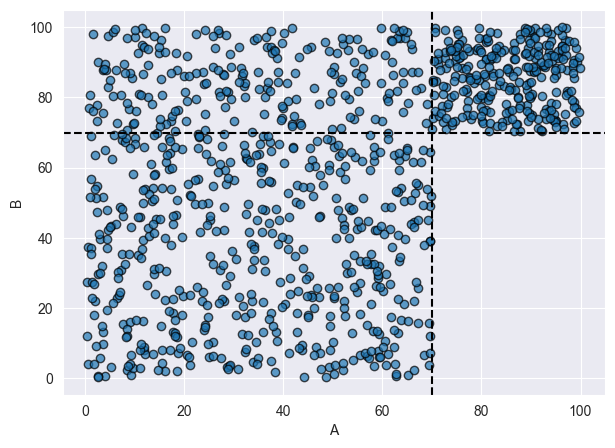

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

n = 1000

# Generate A between 0 and 100
A = np.random.uniform(0, 100, n)

# Generate B depending on A
B = []
for a in A:
    if a > 70:  # if A is high
        b = np.random.uniform(70, 100)  # force B high
    else:
        b = np.random.uniform(0, 100)   # otherwise B can be anything
    B.append(b)

df = pd.DataFrame({"A": A, "B": B})

# --- Plot ---
plt.figure(figsize=(7,5))
plt.scatter(df["A"], df["B"], alpha=0.7, edgecolor="k")
plt.axvline(70, color="black", linestyle="--")
plt.axhline(70, color="black", linestyle="--")
plt.xlabel("A")
plt.ylabel("B")
plt.show()

In [25]:
import pandas as pd
import FIRM.base.operators.implications as implications
import FIRM.base.operators.tnorms as tnorms
import FIRM.base.fuzzy_data as fuzzy_data
from FIRM.methods.AARFI import AARFI

In [26]:
dataset = df[['A', 'B']]
fuzzy_dataset = fuzzy_data.FuzzyDataQuantiles('symmetric',dataset, 3, ['L', 'M', 'H'])

In [27]:
I = implications.ImplicationsExamples.get_fuzzy_implication(implications.ImplicationsExamples.IGNORE)
T = lambda x,y: np.minimum(x,y)

rules = AARFI(dataset, fuzzy_dataset, T, I, min_cov=0.1, min_supp=0.1, min_conf=0.4, max_feat=3)
measures = rules.measures(fuzzy_dataset)
measures

,sentence_rule,num_features,fcoverage,fsupport,fconfidence,fwracc
5,IF ( A IS H ) THEN B IS H,1,0.368185,0.237080,0.643916,0.097839
2,IF ( B IS H ) THEN A IS H,1,0.378183,0.237080,0.626893,0.097839
4,IF ( A IS M ) THEN B IS L,1,0.250279,0.143435,0.573101,0.051208
0,IF ( B IS L ) THEN A IS L,1,0.368497,0.200259,0.543448,0.059664
3,IF ( A IS L ) THEN B IS L,1,0.381536,0.200259,0.524876,0.059664
1,IF ( B IS M ) THEN A IS L,1,0.253320,0.110608,0.436635,0.013957


In [28]:
# Extract measures
num_rules = len(measures['num_features'])
fcoverage = np.mean(measures['fcoverage'])
fsupport = np.mean(measures['fsupport'])
fconfidence = np.mean(measures['fconfidence'])
fwracc = np.mean(measures['fwracc'])

print('num rules: ' + str(len(measures['num_features'])))
print('fcoverage: ' + str(np.mean(measures['fcoverage'])))
print('fsupport: ' + str(np.mean(measures['fsupport'])))
print('fconfidence: ' + str(np.mean(measures['fconfidence'])))
print('fwracc: ' + str(np.mean(measures['fwracc'])))

num rules: 6
fcoverage: 0.3333333333333334
fsupport: 0.18812032559382466
fconfidence: 0.5581447635318912
fwracc: 0.06336191867306784


In [29]:
p=3
I = lambda x,y: 1-x+x*y**p
T = lambda x,y: np.maximum(x+y-1,0)

rules = AARFI(dataset, fuzzy_dataset, T, I, min_cov=0.1, min_supp=0.1, min_conf=0.4, max_feat=3)
measures = rules.measures(fuzzy_dataset)
measures

,sentence_rule,num_features,fcoverage,fsupport,fconfidence,fwracc
1,IF ( B IS H ) THEN A IS H,1,0.378183,0.216658,0.572892,0.077417
4,IF ( A IS H ) THEN B IS H,1,0.368185,0.194536,0.528364,0.055294
0,IF ( B IS L ) THEN A IS L,1,0.368497,0.162546,0.441105,0.021951
3,IF ( A IS M ) THEN B IS L,1,0.250279,0.108764,0.434571,0.016537
2,IF ( A IS L ) THEN B IS L,1,0.381536,0.161762,0.423976,0.021167


In [30]:
# Extract measures
num_rules = len(measures['num_features'])
fcoverage = np.mean(measures['fcoverage'])
fsupport = np.mean(measures['fsupport'])
fconfidence = np.mean(measures['fconfidence'])
fwracc = np.mean(measures['fwracc'])

print('num rules: ' + str(len(measures['num_features'])))
print('fcoverage: ' + str(np.mean(measures['fcoverage'])))
print('fsupport: ' + str(np.mean(measures['fsupport'])))
print('fconfidence: ' + str(np.mean(measures['fconfidence'])))
print('fwracc: ' + str(np.mean(measures['fwracc'])))


num rules: 5
fcoverage: 0.3493360555131496
fsupport: 0.16885312325297788
fconfidence: 0.48018153675288583
fwracc: 0.038473173550425885


In [31]:
p=0.1
I = lambda x,y: 1-x+x*y**p
T = lambda x,y: np.maximum(x+y-1,0)

rules = AARFI(dataset, fuzzy_dataset, T, I, min_cov=0.1, min_supp=0.1, min_conf=0.4, max_feat=3)
measures = rules.measures(fuzzy_dataset)
measures

,sentence_rule,num_features,fcoverage,fsupport,fconfidence,fwracc
11,IF ( A IS H ) THEN B IS H,1,0.368185,0.294610,0.800168,0.155368
5,IF ( B IS H ) THEN A IS H,1,0.378183,0.259314,0.685685,0.120073
7,IF ( A IS M ) THEN B IS L,1,0.250279,0.166446,0.665043,0.074219
0,IF ( B IS L ) THEN A IS L,1,0.368497,0.243631,0.661146,0.103035
6,IF ( A IS L ) THEN B IS L,1,0.381536,0.250113,0.655542,0.109518
2,IF ( B IS L ) THEN A IS M,1,0.368497,0.221394,0.600802,0.129167
1,IF ( B IS M ) THEN A IS L,1,0.253320,0.126514,0.499425,0.029863
8,IF ( A IS L ) THEN B IS M,1,0.381536,0.177862,0.466173,0.081211
3,IF ( B IS M ) THEN A IS M,1,0.253320,0.115396,0.455534,0.051995
4,IF ( B IS M ) THEN A IS H,1,0.253320,0.115044,0.454147,0.021776


In [32]:
# Extract measures
num_rules = len(measures['num_features'])
fcoverage = np.mean(measures['fcoverage'])
fsupport = np.mean(measures['fsupport'])
fconfidence = np.mean(measures['fconfidence'])
fwracc = np.mean(measures['fwracc'])

print('num rules: ' + str(len(measures['num_features'])))
print('fcoverage: ' + str(np.mean(measures['fcoverage'])))
print('fsupport: ' + str(np.mean(measures['fsupport'])))
print('fconfidence: ' + str(np.mean(measures['fconfidence'])))
print('fwracc: ' + str(np.mean(measures['fwracc'])))

num rules: 12
fcoverage: 0.3229280726972777
fsupport: 0.1873458414222224
fconfidence: 0.5701760420265057
fwracc: 0.08311531245645458


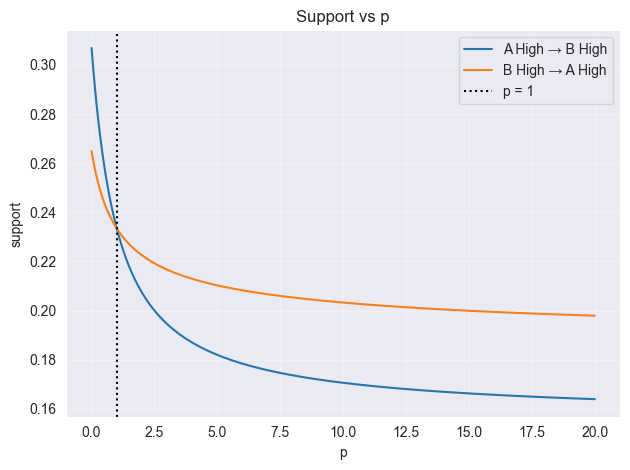

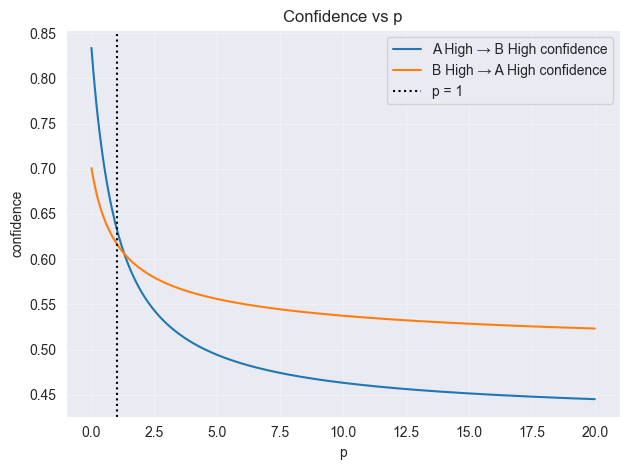

In [33]:
import FIRM.base.ct_fuzzy_rule as fuzzy_rule
import numpy as np
import matplotlib.pyplot as plt

T = lambda x, y: np.maximum(x + y - 1, 0)

rule1 = fuzzy_rule.CRFuzzyRule([(0, 2), (1, 2)])
rule2 = fuzzy_rule.CRFuzzyRule([(1, 2), (0, 2)])

def eval_rules_at_p(p, dataset, fuzzy_dataset):
    I = lambda x, y: 1 - x + x * (y**p)
    rule1.evaluate_rule_database(dataset, fuzzy_dataset, T, I)
    rule2.evaluate_rule_database(dataset, fuzzy_dataset, T, I)
    return {
        "p": p,
        "supp_r1": rule1.fsupport(),
        "supp_r2": rule2.fsupport(),
        "conf_r1": rule1.fconfidence(),
        "conf_r2": rule2.fconfidence(),
    }

p_values = np.linspace(0.001, 20, 300)

traj = [eval_rules_at_p(p, dataset, fuzzy_dataset) for p in p_values]

p_arr = np.array([t["p"] for t in traj])
supp_r1 = np.array([t["supp_r1"] for t in traj])
supp_r2 = np.array([t["supp_r2"] for t in traj])
conf_r1 = np.array([t["conf_r1"] for t in traj])
conf_r2 = np.array([t["conf_r2"] for t in traj])

# ---- plots ----
plt.figure()
plt.plot(p_arr, supp_r1, label="A High → B High")
plt.plot(p_arr, supp_r2, label="B High → A High")
plt.axvline(1, color="black", linestyle=":", label="p = 1")  # vertical line at p=1
plt.xlabel("p")
plt.ylabel("support")
plt.title("Support vs p")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.figure()
plt.plot(p_arr, conf_r1, label="A High → B High confidence")
plt.plot(p_arr, conf_r2, label="B High → A High confidence")
plt.axvline(1, color="black", linestyle=":", label="p = 1")  # vertical line at p=1
plt.xlabel("p")
plt.ylabel("confidence")
plt.title("Confidence vs p")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.show()

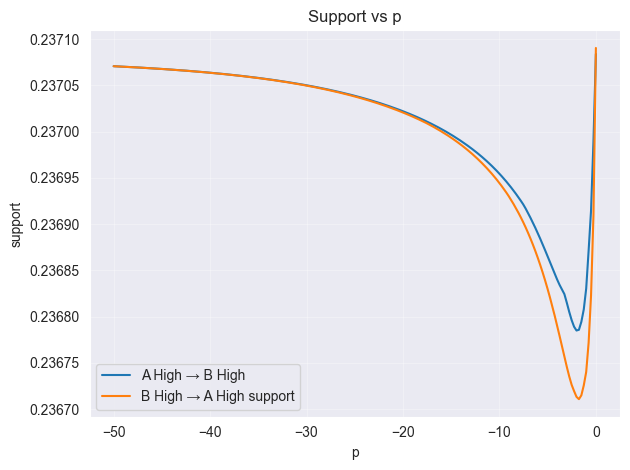

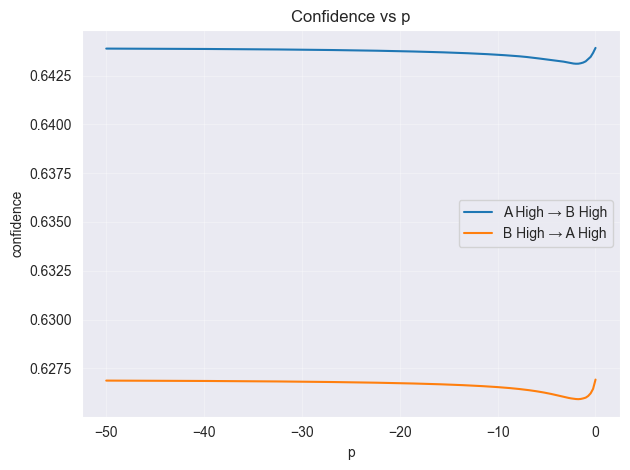

In [34]:
import FIRM.base.ct_fuzzy_rule as fuzzy_rule
import numpy as np
import matplotlib.pyplot as plt


rule1 = fuzzy_rule.CRFuzzyRule([(0, 2), (1, 2)])
rule2 = fuzzy_rule.CRFuzzyRule([(1, 2), (0, 2)])

def eval_rules_at_p(p, dataset, fuzzy_dataset):
    I = lambda x, y: implications.ImplicationsExamples.get_fuzzy_implication(implications.ImplicationsExamples.KSS)(x, y, p)
    T = lambda x, y: tnorms.TnormsExamples.get_tnorm(tnorms.TnormsExamples.SCHWEIZER_SKLAR)(x, y, p)
    rule1.evaluate_rule_database(dataset, fuzzy_dataset, T, I)
    rule2.evaluate_rule_database(dataset, fuzzy_dataset, T, I)
    return {
        "p": p,
        "supp_r1": rule1.fsupport(),
        "supp_r2": rule2.fsupport(),
        "conf_r1": rule1.fconfidence(),
        "conf_r2": rule2.fconfidence(),
    }

# Sweep only positive p values, finer resolution
p_values = np.linspace(-50, 0.01, 200)

traj = [eval_rules_at_p(p, dataset, fuzzy_dataset) for p in p_values]

p_arr = np.array([t["p"] for t in traj])
supp_r1 = np.array([t["supp_r1"] for t in traj])
supp_r2 = np.array([t["supp_r2"] for t in traj])
conf_r1 = np.array([t["conf_r1"] for t in traj])
conf_r2 = np.array([t["conf_r2"] for t in traj])

# ---- plots ----
plt.figure()
plt.plot(p_arr, supp_r1, label="A High → B High")
plt.plot(p_arr, supp_r2, label="B High → A High support")
plt.xlabel("p")
plt.ylabel("support")
plt.title("Support vs p")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.figure()
plt.plot(p_arr, conf_r1, label="A High → B High")
plt.plot(p_arr, conf_r2, label="B High → A High")
plt.xlabel("p")
plt.ylabel("confidence")
plt.title("Confidence vs p")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.show()